

# Project: Investigate a Dataset - [NO-SHOW MEDICAL APPOINTMENTS]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Section A:  Introduction

### Dataset Description 

In this project, I will be considering some factors and questions that affects patients showing up or not showing up for their medical appointment. The [dataset](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) used in this project shows whether one hundred and ten thousand patients in Brazil showed up for their medical appointments or not, along with their bio details. I will analyze the dataset using some very important python packages and functions such as numpy, pandas, matplot, seaborn; and result will be communicated in notes, table, and charts or scatter plots.


### Features and Description

Patient_Id: A unique Number to Identify a Patient.

Appointment_ID: Identification number for each appointment.

Gender: Male (M) or Female (F).

Scheduled_Day: The day a patient called to schedule/ register to see the doctor.

Appointment_Day: The day a patient is supposed to see to see the doctor

Age: How old is the patient.

Neighbourhood: Location of the Hospital.

Scholarship: Whether the patient is enrolled in a Bolsa Familia program or not (Stated as True(1) or False(0))

Hipertension: Stated as True (1) or False (0).

Diabetes: Stated as True (1) or False (0).

Alcoholism: Stated as True (1) or False (0).

Handcap: This Variable has four categoreis (structured from 1-4).

SMS_received: 1 or more messages sent to the patient.

No-show: Yes or No.



### Question(s) for Analysis

#### The following questions are posed in this Project:

* Which age group showed up for most of their appointments?

* Do people tend to show up for their hospital appointments when they receive a reminder?

* Does a Patient’s hypertensive and Diabetic status affect his/her showing up for appointment?

* Does a Patient’s Handicap status affect his/her showing up for appointment?

In [1]:
# importing statements for all packages

import numpy as np
import pandas as pd
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Section B: Data Wrangling



### General Properties

In [2]:
df=pd.read_csv('noshowappointments.csv') 
df.head() #This is to show the First Five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Let us Look at the SUMMARY for our dataset

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**The Cell above showed the statistics of the dataset, for example:**

* The maximum age is of the patients is **115yrs** (Probably the oldest patient on the list). 

* We can also see that the mean age of patients here is **37yrs** and the Minimum as -1(this should be a Human error when entering the data because we cannot have Age as -1yrs, this row will be printed and dropped Later during the explanatory phase.) and the standard deviation of a Patients age from this mean is **23**.

**In the next Cell, I will show how many Column and rows are there, Data set types, and check if there are missing Values**.

In [4]:
df. info() #Checking for data type and total rows/column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
pd.isna(df).sum() #Checking for missing data

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

* This shows that there are 110527 rows and 14 colums in the dataset. 
* Some data (Like **PatientID** is in float and not Integer). 

In the Cleaning Stage, we will convert all Float to Int64, and remove any data we do not want to work with. There are no missing Values in the dataset.

In the next cell, we will check for duplicate rows, and the number of non-null values for each Variable


In [6]:
df.duplicated().sum()

0

In [7]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* There are no duplicate rows.


* But PatientID and appointments made are not equal. It is possible that some patient booked appointment more than once. 


* There are 81 Hospitals in the data set too

## Cleaning and Preparing the Dataset

**in cleaning and preparing the data set, I will consider some issues with our data:**

* Some data (Like **PatientID** is in float and not Integer). Changing it will not be necessary as I will not be using it from here
* Data Type of ScheduledDay and AppointmentDay will be changed to DateTime.
* Some of the Variable names will be corrected. The standard way to write them is to separate two words with an "underscore", for example; ScheduleDay will be changed to Schedule_Day
* We will drop the ScheduleDay and Appointment day for in this Project
* PatienceID will also be dropped

#### (i)  Drop columns we will not be using

In [8]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
# SECTION C: Exploratory Data Analysis


In this section, I will be answering questions posed in the beginning of this project, but first, Let's sort out our Dependent Variable (**No-show**). We will change it from a categorical scale to a binary numeric scale.



**Our Independent Variable will be sms_received and the dependent variable will be no-show**

In [9]:
no_show = df["No-show"].value_counts()
print(no_show)
no_show_percent = (no_show["Yes"]/ no_show.sum()) * 100
print(no_show_percent)

No     88208
Yes    22319
Name: No-show, dtype: int64
20.193255946510806


The percetage of people who did not show up for their appointment is 20.19.


In the next Cell, I will restructure the dependent Variable (the one we are trying to predict) to replace categorical Variable of (Yes =show, No = no-show ) with Binary of (0 = no-show, 1 = show).

In [10]:
df['No-show'].replace("No", 0,inplace=True)
df['No-show'].replace("Yes", 1,inplace=True)

One Last thing before we preceed to the next Phase. We wil rename the "No-show" column to "no_show" and also drop the age column with negavive value(Age should be a non-negative value). These Operations will be done in the next cells.

In [11]:
#Check for where the negative value for Age (-1) is. I assume the error in the below result is as a result of Human error and drop it

negative_age = df.query('Age < 0')
negative_age

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,0,0


In [12]:
df.query('Age < 0')

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,F,-1,ROMÃO,0,0,0,0,0,0,0


In [13]:
df.rename(columns={"No-show":"No_show"}, inplace = True) #To change the column name
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


The column has been renamed and the row with negative age has been dropped!

## Research Question 1:  Which age group showed up for most of their appointments?

First, lets Show Visalization (**Pie Chart and Bar chart of No-Show column**) for the People who showed and people up did not show up for their appointment in the next cell.

In [40]:
#This Cell is Defining Countplot function (plot_bar_1), so as to help us not to repeat code.

def plot_bar_1(data, x_value,title, xlabel, ylabel):
#  A function to draw a histgram 
    sns.countplot(data = data, x = x_value, color = base_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

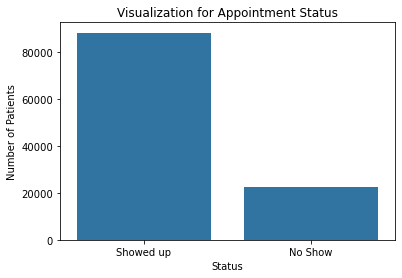

In [42]:
#call the function in previous cell above
plot_bar_1(df,'No_show','Visualization for Appointment Status','Status','Number of Patients');
plt.xticks([0, 1], ['Showed up', 'No Show']);

The above Bar chart shows that Most patients showed for their appointments. The next cell will depict a pie-chart showing the same result

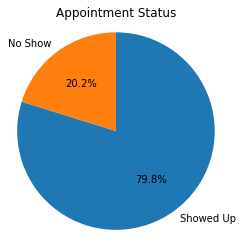

In [15]:
# plot a pie chart
sorted_counts = df.No_show.value_counts()
plt.pie(sorted_counts, labels = ['Showed Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Appointment Status');

From the above diagram, 20.2% of the patients did not show up for their appointment while 79.8% showed up


In the Next cell, **The Age Column** will be investigated.

In [16]:
#Let us Investigate the Age of the Patients
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The mean age is 37yrs. In the next Cell, Age will be gouped and then we will show how this patient ages are distributed in the dataset.

In [17]:
# bin edges will be used to "cut" the data into groups
bin_edges = [0, 18, 37, 55, 115]

# labels for the four age groups
bin_names = ['0-20','21-40','41-60','61 and above']
age_group = pd.cut(df['Age'], bin_edges, labels=bin_names)

# I want to insert a new column (age_group) before column 4
df.insert(3, 'age_group', age_group)

In [18]:
df.head()

,Gender,Age,Neighbourhood,age_group,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,61 and above,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,61 and above,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,61 and above,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0-20,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,61 and above,0,1,1,0,0,0,0


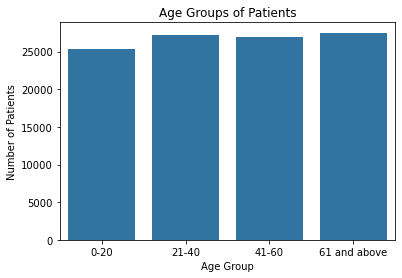

In [43]:
#Ploting countplot for the Age groups

plot_bar_1(df,'age_group','Age Groups of Patients','Age Group','Number of Patients');

The Visualization above showed that the age groups are almost the same. Though there were a little more patients from 21 years and above. The age range almost took the same proportions. Most Patients are below 60

Next, I check which group range tend to show up for their appointment most.

In [20]:
Points = [0, 20, 40, 60, 100]
age_groups = df.groupby(pd.cut(df.Age, Points))
age_groups["No_show"].mean()

Age
(0, 20]      0.228090
(20, 40]     0.229790
(40, 60]     0.185865
(60, 100]    0.152012
Name: No_show, dtype: float64

In [21]:
#This Cell is Defining Barchart Function (plot_bar) to help us not to repeat codes


def plot_bar(x_values, y_values, title, xlabel, ylabel):
#  A function to draw a histgram 
    plt.bar(x_values,y_values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

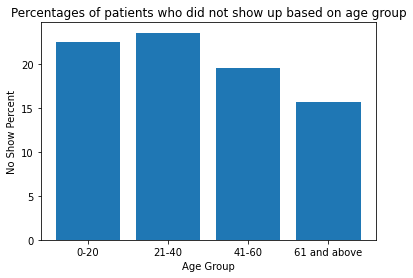

In [33]:
# percentages of patients who did not show up based on age group

no_show_percent = df.groupby('age_group').No_show.mean() * 100

plot_bar(no_show_percent.index,no_show_percent, 'Percentages of patients who did not show up based on age group', 'Age Group', 'No Show Percent');

From the data we can see that the patients that tend to show up most for their appointments are from ages 56 and above, this age group did not show up for 15% of their appointment, compared with the age group of patient under 40years who did not show up for 22% of their appointments. Patient above 56 years are 7% more likely to show up for their medical appointment that patients under 40years. It make some sense since people above 56 years usually need more medical attention.

## Research Question 2:  Do people tend to show up for their hospital appointments when they receive a reminder?

In [23]:
df.groupby('SMS_received')['No_show'].mean()

SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64

From the data above, we can see that people who recieved text reminder only did not showed up for 27% of their appointment, and those who did not even get a text reminder did not showed up for 16% of their appointment. Thus according to this dataset, we can infer that sending them text will not influence their decision on whether they should how up or not, since the Patients who showed up for most of their appointments did not even recieve text reeminders.

## Research Question 3  Does a Patient’s Gender status affect his/her showing up for appointment?

We will check out the Visualization for Gender, before we proceeed to explain the data

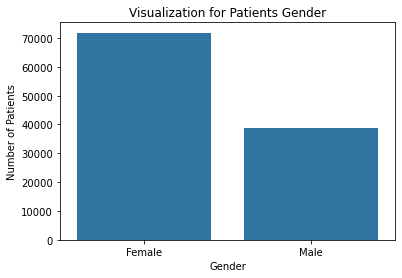

In [44]:
#Ploting Bar for Gender and Number of Patients

plot_bar_1(df,'Gender','Visualization for Patients Gender','Gender','Number of Patients');
plt.xticks([0, 1], ['Female', 'Male']);

In [25]:
Independent_Variable_1 = ['Gender']
for r in Independent_Variable_1 :
    print(df.groupby(r)['No_show'].mean())

Gender
F    0.203146
M    0.199679
Name: No_show, dtype: float64


From the above result, it is not really clear whether Gender affect a patient's decision to show up for medical appointment. The result is too close to make inference. Both Male and Female Patients did not show up for approximately 20% of their appointments. Most of the Patients were Females.

## Research Question 4: Does a Patient’s hipertensive and Diabetic status affect his/her decision to show up for appointment?

In [26]:
Independent_Variable_2 = ['Hipertension','Diabetes']
for r in Independent_Variable_2 :
    print(df.groupby(r)['No_show'].mean())

Hipertension
0    0.209037
1    0.173020
Name: No_show, dtype: float64
Diabetes
0    0.203628
1    0.180033
Name: No_show, dtype: float64


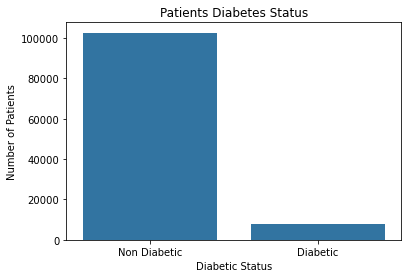

In [46]:
#Ploting Bar for Diabetic Status and Number of Patients

plot_bar_1(df,'Diabetes','Patients Diabetes Status','Diabetic Status','Number of Patients');
plt.xticks([0, 1], ['Non Diabetic', 'Diabetic']);

Froom the above result, patients with hipertension did not show up for 17% of their appointment while patients whose hipertensive status is negative did not show up for 20% of their appointment. Thus, we can say that people suffering from hipertension are 3% more likely to show up for their medical appointment compared to  patients who do not suffer from hipertension. The Visualization shows that a Almost 95% of the Patients are non-diabetic.

Diatebitc Patients are 2% More likely to show up for their medical appointments, compared to patients who are not diabetic.

Most of the patients are not diabetic and Hipertensive



## Research Question 5:  Does a Patient’s Handicap status affect his/her showing up for appointment?

In [28]:
#Let us check how the Handcap column is Structured


df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [29]:
def add(x,y):
    b = x+y
    print(b)

In [30]:
add(12,10)

22


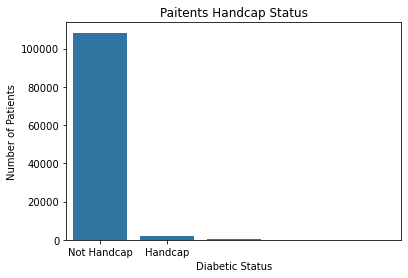

In [48]:
#Ploting Bar for Handicap Status and Number of Patients


plot_bar_1(df,'Handcap','Paitents Handcap Status','Diabetic Status','Number of Patients');
plt.xticks([0, 1], ['Not Handcap', 'Handcap']);

Over 90% of the patients were not handcap. The Handcap column is categorized into 5(info was not given to know what categories are there) but for this project, I only want to know whether a patient is Handcap of not. Thus, I will change the data to binary form, represent 1 as handcap and 0 as not handcap.

<a id='conclusions'></a>
## Conclusions


In this project, I have conidered some factors and questions that affects patients showing up or not showing up for their medical appointment (Factors like: Age; Diability-Handicap-Diabetics-Hipertension status; SMS_reveived; and Gender). The [dataset](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) used in this project shows hospital appointment data of hundred and ten thousand patients in Brazil. I Have also analyze the dataset using some very important python packages and functions such as numpy, pandas, matplot, seaborn; and communicated  my result in notes, table, and charts.


**I also observed the following in this dataset:**

* More than 90% of the Patients showed up for their appointment


* Patient above 56 years are 7% more likely to show up for their medical appointment that patients under 40years. We can use age to draw some inference on whether Patients might show up for their appointment or not


* According to this dataset, we can infer that sending patients reminder text will not influence their decision on whether they should how up or not.


* It is not really clear whether Gender affect a patient's decision to show up for medical appointment, and Most Patients were female


* Most of the patients ado no t have diabetic and Hipertensive conditions


* Diatebitc Patients are 2% More likely to show up for their medical appointments, compared to patients who are not diabetic.

**There are also Limitations to this project**

* Time Constraint. There is not enough time to explore all Variables for this project.


* Data on such research as this should be cross-sectional data. This data related to only one Country


* The meaning of the Variable names were Vague. I Had to look in the discussion forum to understand what they mean.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'noshowappointments.csv.ipynb'])

4294967295